# Import Dataset

In [5]:
# Package to have access to the Zindi Platform features
!pip -q install git+https://github.com/eaedk/testing-zindi-package.git

  Preparing metadata (setup.py) ... done


In [6]:
#@title Input Username
# Login info for a Zindi Account

USERNAME = "Tammy" #@param {type : "string"}

In [7]:
from zindi.user import Zindian
user = Zindian(username=USERNAME) # Sign in                                             # , fixed_password=PASSWORD

Your password
>> ··········

[ 🟢 ] 👋🏾👋🏾 Welcome Tammy 👋🏾👋🏾



In [8]:
user.select_a_challenge(reward='knowledge', kind='hackathon', active='true')                               # Select a Zindi challenge

__________________________________________________________________________________________________________________________________
|     |              |                  |                    |          
|index|  challenge   |     problem      |       reward       |    id    
|     |              |                  |                    |          
----------------------------------------------------------------------------------------------------------------------------------
|  0  | Private Hack |Natural Language P|      E50 000       | indabax-eswatini-2023...
----------------------------------------------------------------------------------------------------------------------------------
|  1  | Public Hack  |    Prediction    |     Knowledge      | free-ai-classes-in-every-city-hackathon-2023...
----------------------------------------------------------------------------------------------------------------------------------
|  2  | Private Hack |Sentiment Analysis|     Knowledge   

In [9]:
user.which_challenge                                    # Get information about the selected challenge


[ 🟢 ] You are currently enrolled in : free-ai-classes-in-every-city-hackathon-2023 challenge,
	Can you accurately predict the prices of houses in Nigeria..



'free-ai-classes-in-every-city-hackathon-2023'

### Import Modules

In [10]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer

In [11]:
test_data =  pd.read_csv('/content/drive/MyDrive/Housing_dataset_test.csv')
train_data =  pd.read_csv('/content/drive/MyDrive/Housing_dataset_train.csv')
samplesub =  pd.read_csv('/content/drive/MyDrive/Sample_submission.csv')

# Exploratory Data Analysis (EDA)

In [12]:
train_data.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [13]:
test_data.head()

,ID,loc,title,bedroom,bathroom,parking_space
0,845,Kano,Penthouse,4,1,2
1,1924,Adamawa,Apartment,2,2,4
2,10718,Adamawa,Bungalow,2,7,2
3,12076,Lagos,Mansion,9,5,2
4,12254,Gombe,Semi-detached duplex,5,6,1


In [14]:
train_data.describe()

,ID,bedroom,bathroom,parking_space,price
count,14000.000000,12201.000000,12195.000000,12189.000000,1.400000e+04
mean,4862.700357,4.308171,3.134235,3.169825,2.138082e+06
std,3818.348214,2.441165,2.035950,1.599415,1.083057e+06
min,0.000000,1.000000,1.000000,1.000000,4.319673e+05
25%,1672.750000,2.000000,1.000000,2.000000,1.393990e+06
50%,3527.000000,4.000000,2.000000,3.000000,1.895223e+06
75%,8011.250000,6.000000,5.000000,4.000000,2.586699e+06
max,12999.000000,9.000000,7.000000,6.000000,1.656849e+07


In [15]:
train_data.shape

(14000, 7)

In [16]:
train_data.duplicated().sum()

0

In [17]:
train_data.isna().sum()

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64

In [18]:
#train_data.fillna(method='ffill', inplace=True)
train_data.dropna(inplace=True)

In [19]:
train_data.isna().sum()

ID               0
loc              0
title            0
bedroom          0
bathroom         0
parking_space    0
price            0
dtype: int64

In [20]:
train_data.nunique()

ID               4957
loc                36
title              10
bedroom             9
bathroom            7
parking_space       6
price            4987
dtype: int64

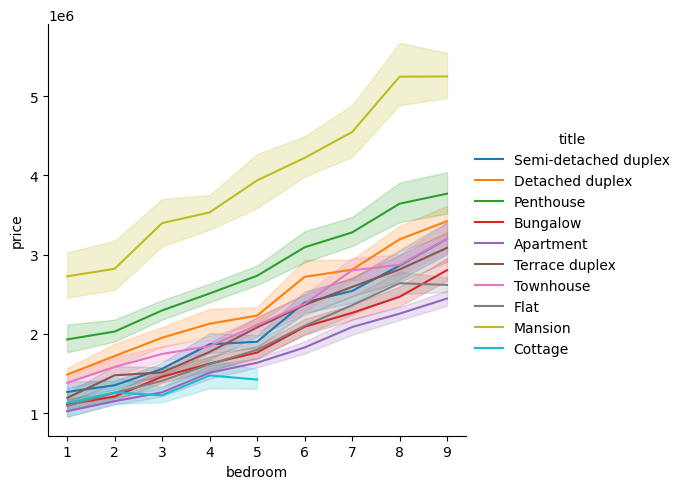

In [21]:
sns.relplot(x = train_data['bedroom'], y=train_data['price'], hue =train_data['title'], kind = 'line')

<ipython-input-22-63e636f20bc5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_data.corr()


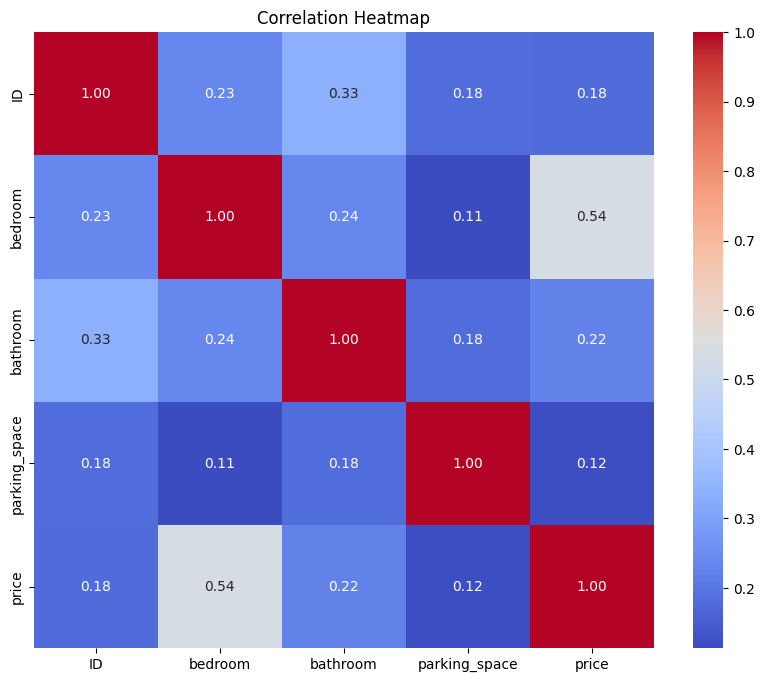

In [22]:
corr_matrix = train_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

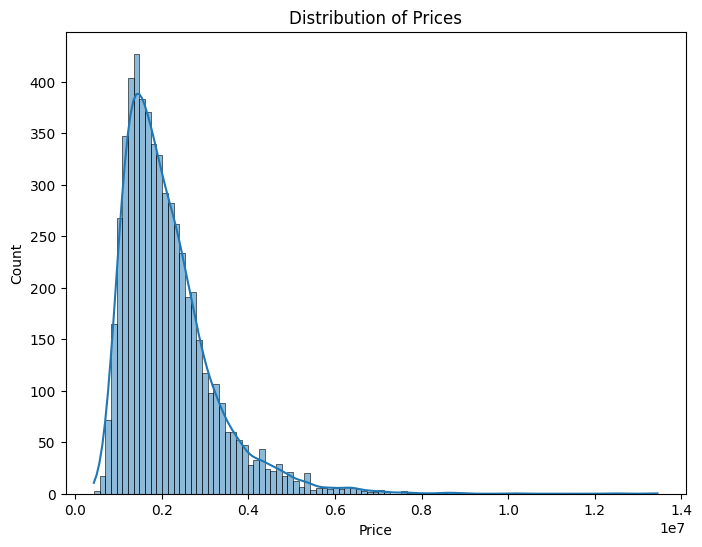

In [23]:
plt.figure(figsize=(8, 6))
sns.histplot(train_data['price'], kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='price', ylabel='loc'>

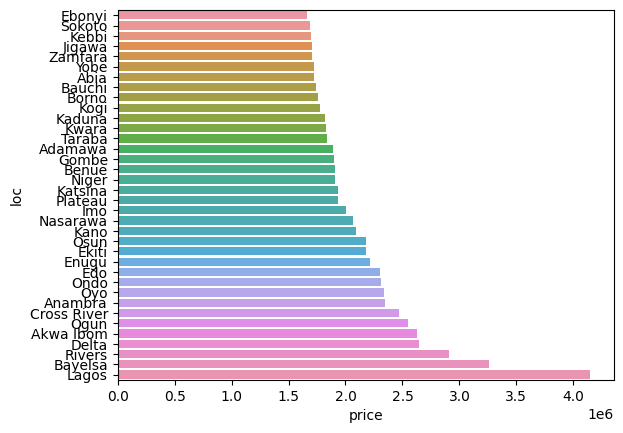

In [24]:
_ = train_data.groupby(['loc'])['price'].mean()
_ = _.to_frame().sort_values('price')
sns.barplot(y=_.index, x=_.price)

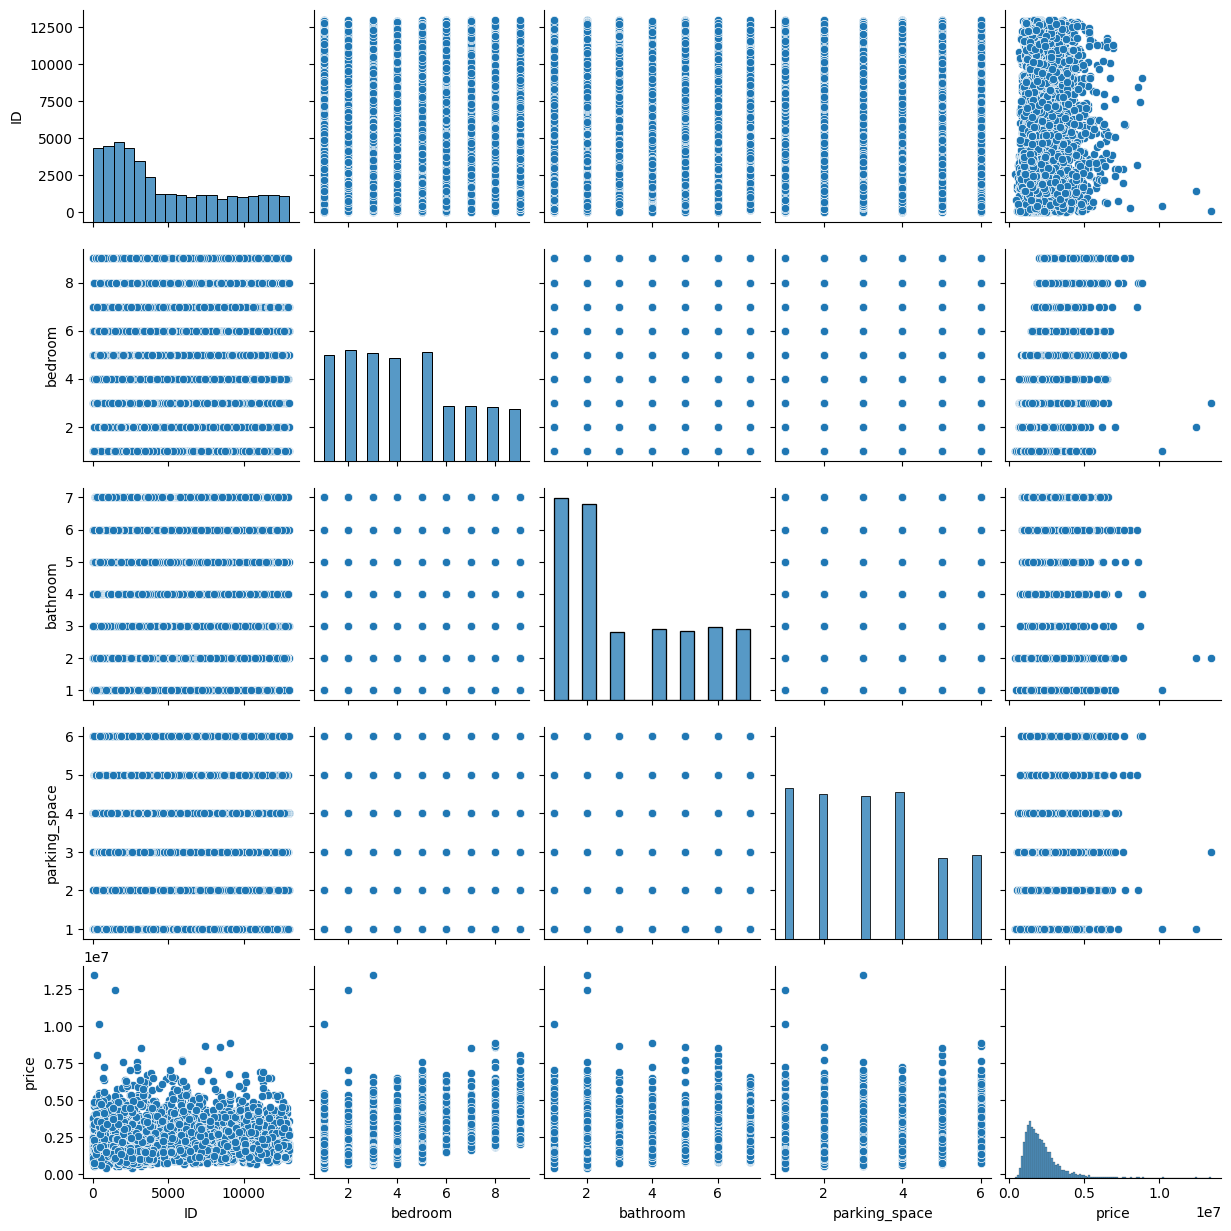

In [25]:


sns.pairplot(train_data)



<Axes: xlabel='parking_space', ylabel='count'>

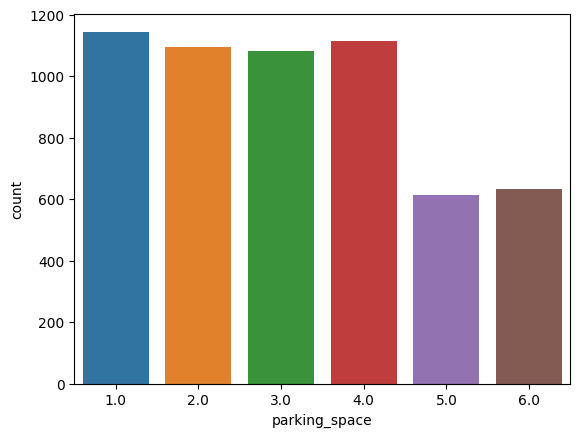

In [26]:
sns.countplot(data = train_data, x  = 'parking_space')

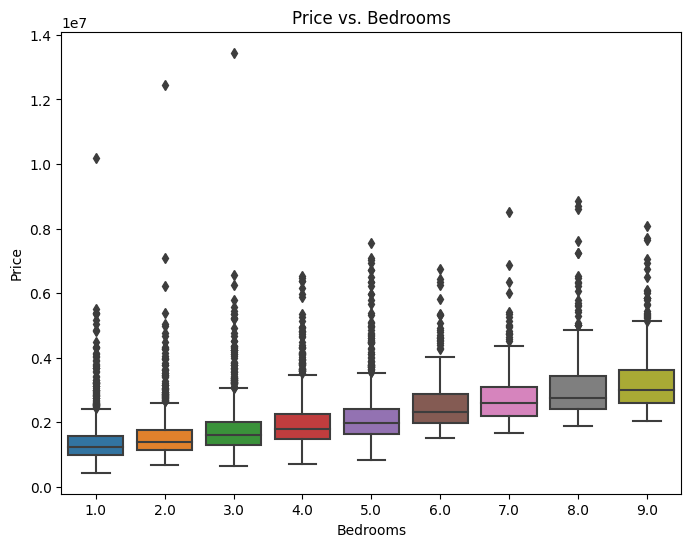

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(data = train_data, y  = 'price',x='bedroom')
plt.title('Price vs. Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

<Axes: xlabel='bedroom', ylabel='price'>

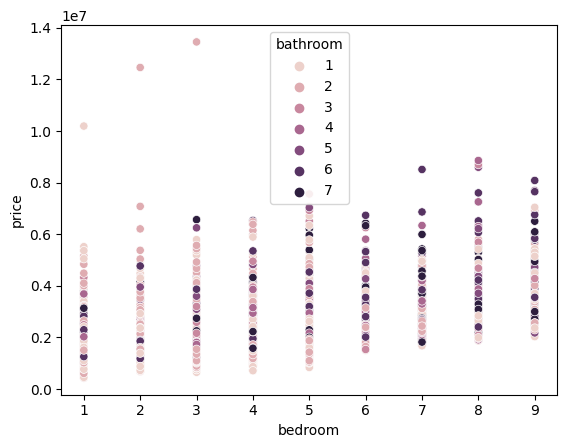

In [28]:

sns.scatterplot(data = train_data, y  = 'price',x='bedroom', hue = 'bathroom')

In [29]:
train_data.corr()

<ipython-input-29-8d2cc80a8830>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,ID,bedroom,bathroom,parking_space,price
ID,1.000000,0.234549,0.334921,0.179464,0.178304
bedroom,0.234549,1.000000,0.235722,0.113282,0.535665
bathroom,0.334921,0.235722,1.000000,0.180620,0.224481
parking_space,0.179464,0.113282,0.180620,1.000000,0.119511
price,0.178304,0.535665,0.224481,0.119511,1.000000


## FEATURE ENGINEERING

In [30]:
train_data['bath_to_bed_ratio'] = train_data.bathroom/train_data.bedroom
test_data['bath_to_bed_ratio'] = test_data.bathroom/test_data.bedroom

In [31]:
train_data_df = pd.get_dummies(train_data, columns=['loc', 'title'],
                          drop_first=True)
train_data_df.head()

,ID,bedroom,bathroom,parking_space,price,bath_to_bed_ratio,loc_Adamawa,loc_Akwa Ibom,loc_Anambra,loc_Bauchi,...,loc_Zamfara,title_Bungalow,title_Cottage,title_Detached duplex,title_Flat,title_Mansion,title_Penthouse,title_Semi-detached duplex,title_Terrace duplex,title_Townhouse
0,3583,2.0,2.0,1.0,1149999.565,1.000000,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2224,5.0,2.0,4.0,2410306.756,0.400000,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
7,3003,3.0,3.0,5.0,2043107.592,1.000000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10,12573,1.0,2.0,6.0,1330213.036,2.000000,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
11,2624,3.0,4.0,2.0,1891772.069,1.333333,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
test_data_df = pd.get_dummies(test_data, columns=['loc', 'title'],
                          drop_first=True)
test_data_df.drop('ID', axis=1, inplace=True)
test_data_df.head()

,bedroom,bathroom,parking_space,bath_to_bed_ratio,loc_Adamawa,loc_Akwa Ibom,loc_Anambra,loc_Bauchi,loc_Bayelsa,loc_Benue,...,loc_Zamfara,title_Bungalow,title_Cottage,title_Detached duplex,title_Flat,title_Mansion,title_Penthouse,title_Semi-detached duplex,title_Terrace duplex,title_Townhouse
0,4,1,2,0.250000,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2,2,4,1.000000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,7,2,3.500000,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,9,5,2,0.555556,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,6,1,1.200000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [33]:
#test_data_df.shape

In [34]:
train_data_df.shape

(5689, 50)

### MODELLING AND TRAINING THE MODEL

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data_df.drop(['ID', 'price'], axis=1).values,
                                                    train_data_df['price'].values,
                                                    test_size=0.2, random_state=42)

In [36]:
y_train = np.log(y_train)
y_test = np.log(y_test)

### XGBOOST

In [37]:
# Define the XGBoost regressor
regressor = xgb.XGBRegressor(objective="reg:squarederror")

# Define the hyperparameter space for random search
param_dist = {
  "n_estimators": [100, 200, 300, 400, 500],
  "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3],
  "max_depth": [3, 5, 7, 9, 11],
  "min_child_weight": [1, 3, 5, 7, 9],
  "subsample": [0.7, 0.8, 0.9, 1.0],
  "colsample_bytree": [0.7, 0.8, 0.9, 1.0],
  "gamma": [0, 0.1, 0.2, 0.3, 0.4],
  "reg_alpha": [0, 0.001, 0.01, 0.1, 1.0],
  "reg_lambda": [0, 0.001, 0.01, 0.1, 1.0]
}

In [ ]:
# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    regressor, param_distributions=param_dist, n_iter=100, scoring='neg_mean_squared_error',
    cv=10, verbose=1, random_state=42, n_jobs=-1
)

# Fit the random search to the training data
random_search.fit(X_train, y_train)

 #Get the best hyperparameters found
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [ ]:
 # Train the XGBoost regressor with the best hyperparameters
best_regressor = xgb.XGBRegressor(**best_params, objective="reg:squarederror")
best_regressor.fit(X_train, y_train)

In [ ]:
# Make predictions on the test set
y_pred = best_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)

### CATBOOST

In [ ]:
!pip install catboost

from catboost import CatBoostRegressor
import seaborn as sns
from sklearn.linear_model import LinearRegression,ElasticNet, Ridge
import xgboost as xgb
from sklearn.ensemble import VotingRegressor
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import Normalizer

In [ ]:
# Define the CatBoost Regressor model

cb_model = CatBoostRegressor(verbose=0)

# Define the hyperparameter grid for RandomizedSearchCV
from scipy.stats import randint, uniform

# Define parameter distributions for CatBoost Regressor
param_grid = {
    'iterations': randint(100, 1001),          # Number of boosting iterations
    'depth': randint(1, 11),                   # Depth of the trees
    'learning_rate': uniform(0.001, 0.1),      # Learning rate for boosting process
    'l2_leaf_reg': uniform(1, 10),             # L2 regularization term
    'bagging_temperature': uniform(0, 1),      # Control overfitting by using bagging
}


# Perform RandomizedSearchCV to find the best model
random_search = RandomizedSearchCV(
    cb_model,
    param_distributions=param_grid,
    n_iter=100,
    scoring='neg_mean_squared_error',  # Use a suitable metric for regression tasks
    cv=10,  # Cross-validation folds
    random_state=42,
    n_jobs=-1,  # Use all available CPU cores
)

# Fit the model to the data
random_search.fit(X_train, y_train)

# Get the best model
best_cb_model = random_search.best_estimator_

# Print the best hyperparameters and its corresponding mean squared error
print("Best Hyperparameters:", random_search.best_params_)
print("Best Mean Squared Error:", -random_search.best_score_)

In [ ]:
# Make predictions on the test set
y_pred = best_cb_model.predict(X_test)

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)

### LINEAR REGRESSION


In [ ]:
linear = LinearRegression()

# Step 5: Define hyperparameter search space (if required, add more hyperparameters to the dictionary)
param_dist = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False],
    'n_jobs': [-1, None]  # -1: Use all available CPU cores, None: 1 core
    #'normalize': [True, False]
}

# Step 6: Perform RandomizedSearchCV to find the best model
random_search = RandomizedSearchCV(linear, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Get the best model from RandomizedSearchCV
best_model = random_search.best_estimator_

# Print the best hyperparameters and best score
print("Best Hyperparameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

In [ ]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)

### NEURAL NETWORK

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from scipy.stats import reciprocal
from sklearn.preprocessing import StandardScaler
from torch.optim.lr_scheduler import StepLR

# Step 1: Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Create an instance of the MLPRegressor model
mlp_regressor = MLPRegressor(random_state=42)

# Step 3: Define hyperparameter search space
param_dist = {
    'hidden_layer_sizes': [(100,), (100, 50), (200, 100, 50)],
    'alpha': reciprocal(1e-6, 1e-2),
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': reciprocal(1e-4, 1e-2),
    'max_iter': [500, 1000, 1500],
    'batch_size': [16, 32, 64],
    'early_stopping': [True, False],
}

# Step 4: Perform RandomizedSearchCV to find the best model
random_search = RandomizedSearchCV(
    mlp_regressor,
    param_distributions=param_dist,
    n_iter=100,
    scoring='neg_mean_squared_error',
    cv=5,
    random_state=42,
    n_jobs=-1
)

# Step 5: Fit the model to the data
random_search.fit(X_train_scaled, y_train)

# Step 6: Get the best model
best_mlp_model = random_search.best_estimator_

# Step 7: Print the best hyperparameters and its corresponding mean squared error
print("Best Hyperparameters:", random_search.best_params_)
print("Best Mean Squared Error:", -random_search.best_score_)

# Step 8: Make predictions on the test set
y_pred = best_mlp_model.predict(X_test_scaled)

# Step 9: Evaluate the model's performance on the test set
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

### ENSEMBLE

In [ ]:
# Create ensemble model
ensemble_model = VotingRegressor(
    estimators=[
(#'linear', best_model),
('xgb', best_regressor),
("catboost", best_cb_model),
('neural', best_mlp_model),
]
)

# Fit the ensemble model
ensemble_model.fit(X_train, y_train)

# Evaluate the ensemble model on the test set
test_score = ensemble_model.score(X_test, y_test)
print(f"Ensemble Model Test R^2 Score: {test_score:.2f}")

In [ ]:
# Make predictions on the test set
y_pred = ensemble_model.predict(X_test)

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)

 ### Predicition and Submission

In [ ]:
# Perform inverse log on prediction
predictions = np.exp(ensemble_model.predict(test_data_df))
predictions

In [ ]:
samplesub['price']=np.round(predictions, 2)
samplesub.head()

In [ ]:
samplesub.to_csv('samplesub3.csv', index=False)

In [ ]:
user.submit(filepaths=['/content/samplesub3.csv'], comments=['4th submission'])